In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print(df.head())

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [6]:
#NAIVE BAYES MODEL
naive_model = MultinomialNB()
naive_model.fit(X_train_tfidf, y_train)
naive_preds = naive_model.predict(X_test_tfidf)

In [7]:
#LOGIISTIC REGRESSION MODEL
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf, y_train)
log_preds = log_model.predict(X_test_tfidf)

In [8]:
#SVM MODEL
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
svm_preds = svm_model.predict(X_test_tfidf)


--- Naive Bayes ---
Accuracy: 0.9668161434977578
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



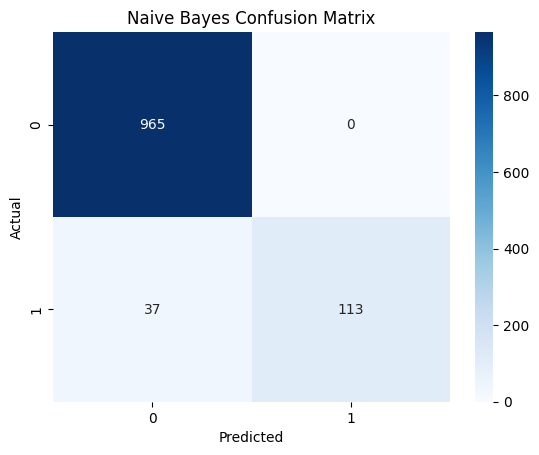


--- Logistic Regression ---
Accuracy: 0.9524663677130045
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



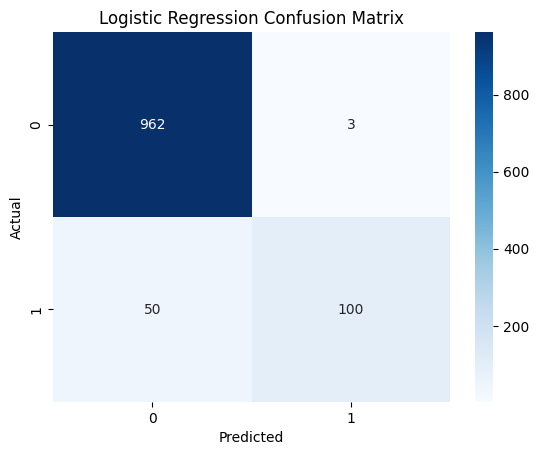


--- Support Vector Machine ---
Accuracy: 0.97847533632287
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



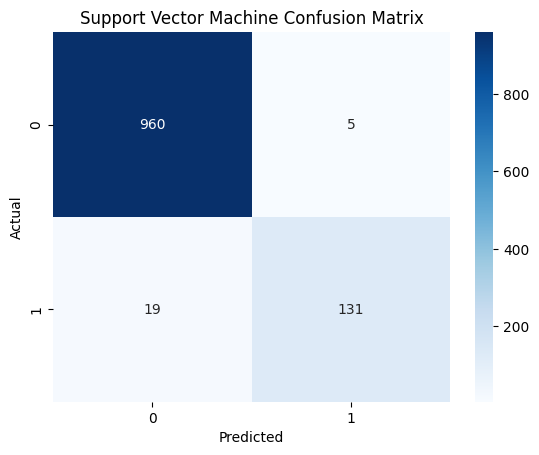

In [9]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model("Naive Bayes", y_test, naive_preds)
evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Support Vector Machine",y_test,svm_preds)

In [10]:
def classify_message(message):
    input_tfidf = vectorizer.transform([message])
    naive_result = naive_model.predict(input_tfidf)[0]
    log_result = log_model.predict(input_tfidf)[0]
    svm_result = svm_model.predict(input_tfidf)[0]

    print("\n--- Your Message ---")
    print(f"Message: \"{message}\"")
    print("\n--- Model Predictions ---")
    print(f"Naive Bayes: {'SPAM' if naive_result == 1 else 'HAM'}")
    print(f"Logistic Regression: {'SPAM' if log_result == 1 else 'HAM'}")
    print(f"SVM: {'SPAM' if svm_result == 1 else 'HAM'}")

while True:
    user_input = input("\nEnter an SMS message (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print("Goodbye!")
        break
    classify_message(user_input)


Enter an SMS message (or type 'exit' to quit):  Congratulations, you have won a 20 lakh rupees in a lucky draw competition



--- Your Message ---
Message: "Congratulations, you have won a 20 lakh rupees in a lucky draw competition"

--- Model Predictions ---
Naive Bayes: SPAM
Logistic Regression: HAM
SVM: HAM



Enter an SMS message (or type 'exit' to quit):  Hi!, how are you doing?



--- Your Message ---
Message: "Hi!, how are you doing?"

--- Model Predictions ---
Naive Bayes: HAM
Logistic Regression: HAM
SVM: HAM



Enter an SMS message (or type 'exit' to quit):  exit


Goodbye!
